
<img src="fga.png" width="1200" height="400">


<h1><center>Aula 1 - Modelagem do Preço </center></h1>

A presente atividade prática abordará a modelagem estocástica do preço, somado a conceituação de volatilidade, expectativa de retorno o índice Sharpe entre outros aspectos fundamentais e quantitativos.


<ul>
    <li> <b>Universidade de Brasília - UnB</b> </li>
    <li> <b>Campus UnB Gama</b> </li>
    <li> <b>Disciplina: Processamento Digital de Sinais Financeiros</b> </li>
    <a href="https://www.linkedin.com/in/marcelino-andrade-b164b369/">
    <li> <b>Prof. Marcelino Monteiro de Andrade Dr.</b> </li>
</ul>


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#Brownian motion">Modelo com Movimento Browniano</a></li>
        <li><a href="#Geometric Brownian motion">Modelo com Movimento Browniano Geometrico</a></li>
        <li><a href="#Log-return">Retorno de um Ativo Financeiro</a></li>
        <li><a href="#Expected return and volatility "> Expectativa de Retorno e Volatilidade </a></li>
        <li><a href="#Risco Retorno">Diagrama Risco Retorno</a></li>
        <li><a href="#Indice Sharpe">Índice Sharpe</a></li>
        <li><a href="#Correlação">Índice de Correlação</a></li>
    </ol>
</div>
<br>
<hr>

Import the Following Libraries:
<ul>
    <li> <b>numpy (as np)</b> </li>
    <li> <b>matplotlib.pyplot (as plt)</b> </li>
    <li> <b>pandas</b> </li>
    <li> <b>seaborn (as sns)</b> </li>
</ul>


In [1]:
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime as dt
import yfinance as yf
from tqdm.notebook import tqdm
plt.style.use('dark_background')


<div id="Brownian motion">
    <h2>1) Modelo de Preço com Movimento Browniano</h2>
</div>

<b>Bachelier</b> in 1900 descreveu o movimento do preço como <br>

<ul>
$ \large
\begin{equation}
 p(t)=p(0)+\mu t + \sigma w(t)\\ 
 \end{equation}
$
</ul>

Text(0.5, 1.0, 'Preço Modelado com Movimento Browniano')

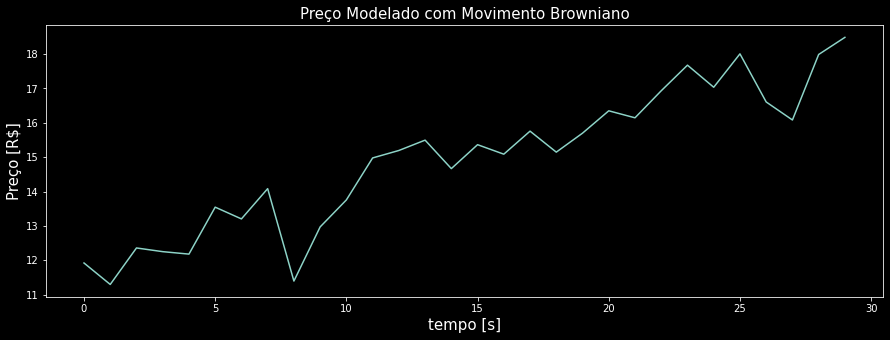

In [2]:
po=12
mu=.2
sigma=.9
w = np.random.normal(0,1, 30)
t=np.arange(0,30)

p1=po+mu*t+sigma*w

fig = plt.subplots(figsize=(15, 5))
plt.plot(p1)
plt.ylabel('Preço [R$]',fontsize=15)
plt.xlabel('tempo [s]',fontsize=15)
plt.title('Preço Modelado com Movimento Browniano',fontsize=15)


<div id="Geometric Brownian motion">
    <h2>2) Modelo de Preço com Movimento Browniano Geometrico</h2>
</div>

Uma melhor modelagem corresponde ao <b>Movimento Geometrico Browniano</b> definido por 
<ul>
$ \large
\begin{equation} 
 \frac{dp(t)}{p(t)}  = \mu dp(t) + \sigma dw(t) \\
 p(t)  =p(0)exp[(\mu-\frac{\sigma^2}{2})t+\sigma w(t)] 
\end{equation} 
$
</ul>

Text(0.5, 1.0, 'Preço Modelado com movimento browniano Geometrico')

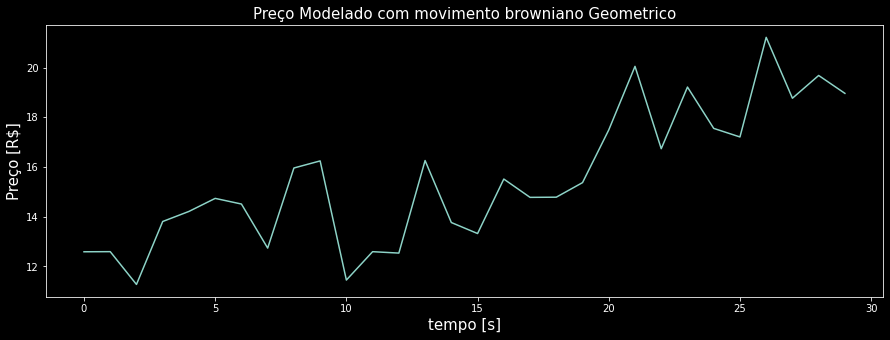

In [3]:
po=12
mu=.02
sigma=.11
w = np.random.normal(0,1, 30)
t=np.arange(0,30)
p2=po*np.exp((mu-(sigma**2)/2)*t+sigma*w)

fig = plt.subplots(figsize=(15, 5))
plt.plot(p2)
plt.ylabel('Preço [R$]',fontsize=15)
plt.xlabel('tempo [s]',fontsize=15)
plt.title('Preço Modelado com movimento browniano Geometrico',fontsize=15)

In [4]:
df=pd.DataFrame(p1)
df.columns=['p1']
df['p2']=p2
df.describe()

,p1,p2
count,30.000000,30.000000
mean,14.922271,15.529460
std,2.068389,2.706253
min,11.296166,11.271011
25%,13.289107,13.431490
50%,15.170947,15.076696
75%,16.298893,17.420453
max,18.487584,21.217315


Text(0.5, 1.0, 'Preços Modelados com Movimento Browniano Geometrico')

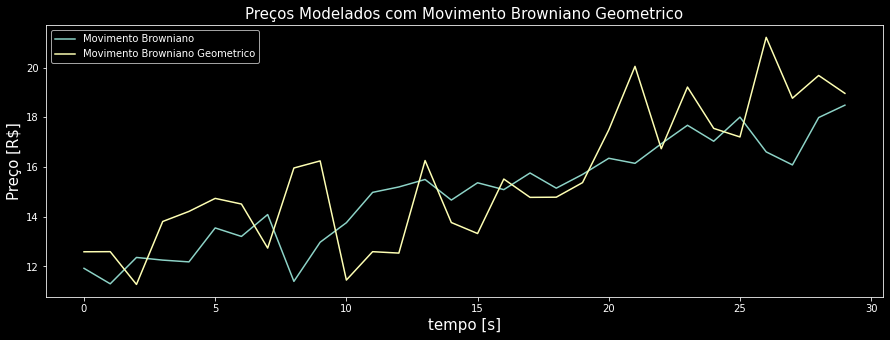

In [5]:
df=pd.DataFrame(p1)
df.columns=['p1']
df['p2']=p2

fig = plt.subplots(figsize=(15, 5))
plt.plot(df['p1'],label='Movimento Browniano')
plt.plot(df['p2'],label='Movimento Browniano Geometrico')

plt.legend(loc='upper left')
plt.ylabel('Preço [R$]',fontsize=15)
plt.xlabel('tempo [s]',fontsize=15)
plt.title('Preços Modelados com Movimento Browniano Geometrico',fontsize=15)


<div id="Log-return">
    <h2>3) Retorno de um Ativo Financeiro</h2>
</div>

O <b>retorno</b> de um ativo em tempo discreto pode ser definindo pelas seguintes equações

<ul>
$ \large
\begin{equation}
 r(n)=\frac{p(n)-p(n-1)}{p(n-1)} \\ 
 r(n)=\frac{p(n)}{p(n-1)}-1 \\
 r(n)=ln[p(n)]-ln[p(n-1)]=ln[\frac{p(n)}{p(n-1)}]\cong\frac{p(n)}{p(n-1)}-1 
\end{equation}
$
</ul>

In [6]:
p1[1:]-p1[0:-1]

array([-0.62416997,  1.06178633, -0.107298  , -0.07157199,  1.36659269,
       -0.34209055,  0.88096116, -2.68972514,  1.57541338,  0.78612754,
        1.22149195,  0.21715461,  0.30113438, -0.82860304,  0.69638916,
       -0.27647381,  0.67029878, -0.61086887,  0.55239442,  0.65047463,
       -0.20344288,  0.78688681,  0.74507275, -0.64251888,  0.97131097,
       -1.39996935, -0.52439716,  1.90646521,  0.49842261])

Text(0.5, 1.0, 'Retorno Modelado com movimento browniano Geometrico')

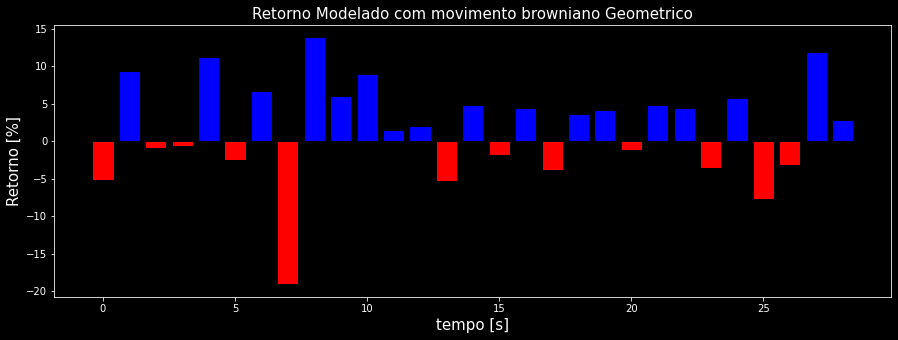

In [7]:
r1=np.log(p1[1:])-np.log(p1[0:-1])

fig = plt.subplots(figsize=(15, 5))

r1m=df['p1'][1:].values/df['p1'][0:-1].values-1
r1m[np.where(r1m>=0)]=0
plt.bar(range(len(r1)),100*r1m,color='red',edgecolor='black')

r1m=df['p1'][1:].values/df['p1'][0:-1].values-1
r1m[np.where(r1m<0)]=0
plt.bar(range(len(r1)),100*r1m,color='blue',edgecolor='black')


plt.ylabel('Retorno [%]',fontsize=15)
plt.xlabel('tempo [s]',fontsize=15)
plt.title('Retorno Modelado com movimento browniano Geometrico',fontsize=15)


In [8]:
r1

array([-0.05378247,  0.08983639, -0.00872042, -0.00585943,  0.10634739,
       -0.02557897,  0.0645898 , -0.21191923,  0.12949812,  0.05884433,
        0.0850713 ,  0.01439428,  0.01962416, -0.05495427,  0.04638561,
       -0.01815887,  0.04346894, -0.03953765,  0.03581991,  0.04059804,
       -0.01252124,  0.04758446,  0.04306017, -0.03702206,  0.05544987,
       -0.08093414, -0.03208599,  0.11202551,  0.02732994])

Text(0.5, 1.0, 'Retorno Modelado com movimento browniano Geometrico')

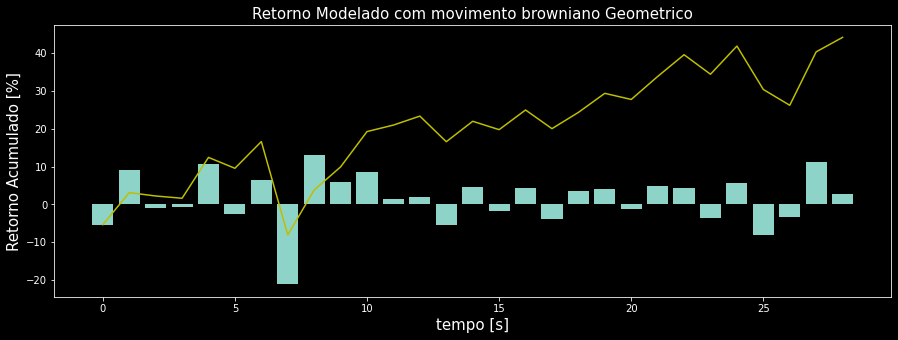

In [9]:
def sumper(per):
    persum=np.cumprod(1 + per) - 1
    return 100*persum

fig = plt.subplots(figsize=(15, 5))

plt.plot(sumper(r1),"y")
plt.bar(range(len(r1)),100*r1)
plt.ylabel('Retorno Acumulado [%]',fontsize=15)
plt.xlabel('tempo [s]',fontsize=15)
plt.title('Retorno Modelado com movimento browniano Geometrico',fontsize=15)

Text(0.5, 1.0, 'Retornos Modelados com Movimento Browniano Geometrico')

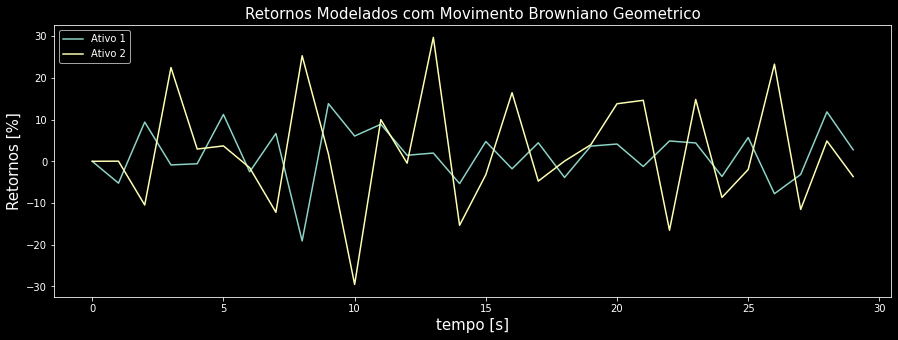

In [10]:
r1=df['p1'][1:].values/df['p1'][0:-1].values-1
df['r1']=np.concatenate(([0], r1), axis=0)
r2=df['p2'][1:].values/df['p2'][0:-1].values-1
df['r2']=np.concatenate(([0], r2), axis=0)
#fig = plt.subplots()
#df[['r1','r2']].plot()
#df

fig = plt.subplots(figsize=(15, 5))
plt.plot(100*df['r1'],label='Ativo 1')  
plt.plot(100*df['r2'],label='Ativo 2') 
plt.legend(loc='upper left')
plt.legend(loc='upper left')
plt.ylabel('Retornos [%]',fontsize=15)
plt.xlabel('tempo [s]',fontsize=15)
plt.title('Retornos Modelados com Movimento Browniano Geometrico',fontsize=15)

In [11]:
print("Inicio do Data Frame:")
print(df.head())
print("")
print("Fim do Data Frame:")
print(df.tail())
print("")
print("Algumas Informações:")
print(df.describe())

Inicio do Data Frame:
          p1         p2        r1        r2
0  11.920336  12.586166  0.000000  0.000000
1  11.296166  12.590742 -0.052362  0.000364
2  12.357953  11.271011  0.093995 -0.104818
3  12.250655  13.805012 -0.008683  0.224825
4  12.179083  14.210588 -0.005842  0.029379

Fim do Data Frame:
           p1         p2        r1        r2
25  18.007063  17.208207  0.057016 -0.019619
26  16.607093  21.217315 -0.077746  0.232977
27  16.082696  18.767181 -0.031577 -0.115478
28  17.989161  19.683004  0.118541  0.048799
29  18.487584  18.962675  0.027707 -0.036596

Algumas Informações:
              p1         p2         r1         r2
count  30.000000  30.000000  30.000000  30.000000
mean   14.922271  15.529460   0.016975   0.022654
std     2.068389   2.706253   0.067294   0.136191
min    11.296166  11.271011  -0.190970  -0.295246
25%    13.289107  13.431490  -0.023440  -0.044764
50%    15.170947  15.076696   0.023762   0.000415
75%    16.298893  17.420453   0.054946   0.128458
ma

<div id="Expected return and volatility">
    <h2>4) Expectativa de Retorno e Volatilidade</h2>
</div>


A <b>Média</b> and <b>Desvio Padrão</b> do retorno de um ativo, $\mu$ and $\sigma$, são definidos com a <b>expectativa de retorno</b> e a  <b>volatilidade</b> de um ativo
<ul>
$ \large
\begin{equation} 
\mu=E\{ r(n) \}=E\{\frac{p(n)-p(n-1)}{p(n-1)}\} \\
\sigma=E\{r(n)-\mu\}=(E\{r(n)^2\}-\mu^2 )^{\frac{1}{2}} \\
\end{equation}
$
</ul>

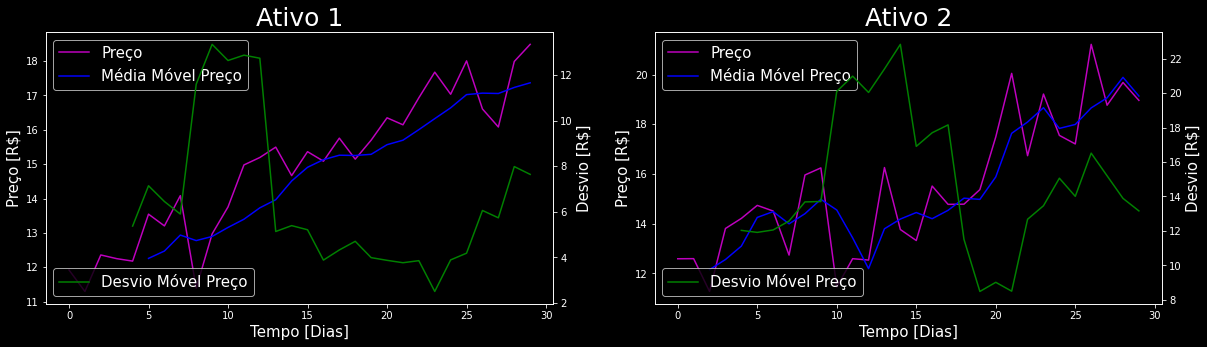

In [12]:
r1=df['p1'][1:].values/df['p1'][0:-1].values-1
df['r1']=100*np.concatenate(([0], r1), axis=0)

r2=df['p2'][1:].values/df['p2'][0:-1].values-1
df['r2']=100*np.concatenate(([0], r2), axis=0)

fig = plt.subplots(figsize=(20,5))

ax1=plt.subplot(1,2, 1) 
ax1.plot(df['p1'], color='m',label='Preço')  
ax1.plot(df['p1'].rolling(window=6).mean(), color='b',label='Média Móvel Preço')  

ax2 = ax1.twinx()
ax2.plot(df['r1'].rolling(window=5).std(), color='g',label='Desvio Móvel Preço')  
ax1.set_title('Ativo 1',fontsize=25)
ax1.set_ylabel('Preço [R$]',fontsize=15)
ax2.set_ylabel('Desvio [R$]',fontsize=15)
ax1.set_xlabel('Tempo [Dias]',fontsize=15)
ax1.legend(loc='upper left',fontsize=15)
ax2.legend(loc='lower left',fontsize=15)

ax1=plt.subplot(1,2, 2) 
ax1.plot(df['p2'], color='m',label='Preço')  
ax1.plot(df['p2'].rolling(window=3).mean(), color='b',label='Média Móvel Preço')  

ax2 = ax1.twinx()
ax2.plot(df['r2'].rolling(window=5).std(), color='g',label='Desvio Móvel Preço')  
ax1.set_title('Ativo 2',fontsize=25)
ax1.set_ylabel('Preço [R$]',fontsize=15)
ax2.set_ylabel('Desvio [R$]',fontsize=15)
ax1.set_xlabel('Tempo [Dias]',fontsize=15)
ax1.legend(loc='upper left',fontsize=15)
ax2.legend(loc='lower left',fontsize=15)


<div id="Risco Retorno">
    <h2>5) Diagrama Risco Retorno</h2>
</div>


Em um <b>diagrama retorno x risco </b> para um dado retorno previsto o risco também é estimado

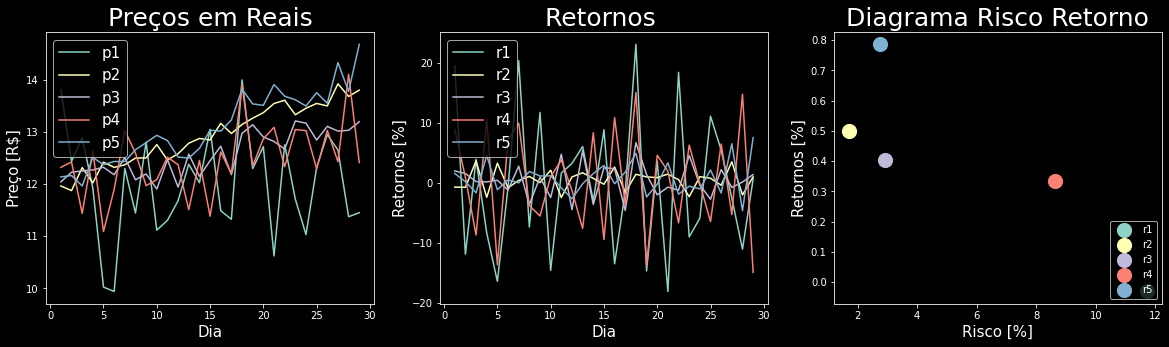

In [13]:
def MBG(po,mu,sigma,t):
    w = np.random.normal(0,1, t)
    t=np.arange(0,t)
    return po*np.exp((mu-(sigma**2)/2)*t+sigma*w)


po    =    [12,   12,   12,   12, 12]
mu    =    [.003, 0.005, 0.0033, 0.0041, 0.006]
sigma =    [0.08,  0.01,  0.02, 0.05, 0.022]
t     =    30

df=None

for i in range(len(po)):
    
    if df is None:
        df=pd.DataFrame(MBG(po[i],mu[i],sigma[i],t))
    else:
        df=pd.concat([df,pd.DataFrame(MBG(po[i],mu[i],sigma[i],t))],axis=1)

df.columns=list(['p'+str(x) for x in range(1,len(po)+1)])
ret=100*df[df.columns[:5]].diff()/df[df.columns[:5]].iloc[0]

ret.columns=list(['r'+str(x) for x in range(1,len(po)+1)])
df=pd.concat([df, ret], axis=1)
df=df.dropna()

fig = plt.subplots(figsize=(20,5))

ax1=plt.subplot(1,3, 1) 
df[df.columns[:5]].plot(ax=ax1)
ax1.set_title('Preços em Reais',fontsize=25)
ax1.set_ylabel('Preço [R$]',fontsize=15)
ax1.set_xlabel('Dia',fontsize=15)
ax1.legend(loc='upper left',fontsize=15)

ax1=plt.subplot(1,3, 2) 
df[df.columns[5:]].plot(ax=ax1)
ax1.set_title('Retornos ',fontsize=25)
ax1.set_ylabel('Retornos [%]',fontsize=15)
ax1.set_xlabel('Dia',fontsize=15)
ax1.legend(loc='upper left',fontsize=15)

ax3=plt.subplot(1,3, 3) 
x = df[df.columns[5:]].std().values
y = df[df.columns[5:]].mean().values


#colors = ['b', 'darkorange', 'green', 'r', 'purple']
for i in range(len(x)):
    ax3.scatter(x[i],y[i],  s=200, label='r'+str(1+i))

    
    
    
plt.legend(loc='lower right')


plt.ylabel('Retornos [%]',fontsize=15)
plt.xlabel('Risco [%]',fontsize=15)

plt.title('Diagrama Risco Retorno',fontsize=25)
plt.show()


In [14]:
df[df.columns[5:]].mean()

r1   -0.030308
r2    0.501035
r3    0.404980
r4    0.335430
r5    0.785742
dtype: float64

<div id="Indice Sharpe">
    <h2>6) Indice Sharpe</h2>
</div>



O <b>Índice de Sharpe</b> foi criado por William Sharpe (Nobel de Economia em 1990) e permite avaliar a relação entre o retorno e o risco de um investimento. Ele mede qual é a relação entre o retorno excedente ao ativo livre de risco e a volatilidade.
O <b>Índice Sharpe</b> é definido por
<ul>


$ \Large
\begin{equation} 
 SR=\frac{\mu-r_f}{\sigma}  
\end{equation}
$


</ul>

In [15]:
sharpe5=(df['r5'].mean()-2/(12))/df['r5'].std()
sharpe2=(df['r2'].mean()-2/(12))/df['r2'].std()
print("Indice Sharpe de r5 = %.2f e Indice Shape de r2 = %.2f" % (sharpe5, sharpe2))

Indice Sharpe de r5 = 0.22 e Indice Shape de r2 = 0.20


<div id="Correlação">
    <h2>7) Indice de Correlação</h2>
</div>



O <b>coeficiente de correlação </b> de Pearson ou "ρ de Pearson" identifica o grau da correlação entre duas variáveis &emsp;

<ul> 
$ \large
\begin{equation}  
 cov[r_1(n),r_2(n)]=E\{r_{1}(n)r_{2}(n)\}-\mu_{1} \mu \\[10pt]
 \rho=\frac{E\{r_{1}(n)r_{2}(n)\}-\mu_{1} \mu_{2}}{\sigma_{1} \sigma_{2}} \\
\end{equation}  
$
</ul>


In [16]:
cor1=(np.mean(df['r1']*df['r2'])-np.mean(df['r1'])*np.mean(df['r2']))/(np.std(df['r1'])*np.std(df['r2']))
cor2=df[['r1','r2']].corr()

print("Indice de correlação pela equação explícita (%.6f) e função implícita (%.6f)" % (cor1, cor2['r1'][1]))

Indice de correlação pela equação explícita (-0.074461) e função implícita (-0.074461)


In [17]:
df.corr()

,p1,p2,p3,p4,p5,r1,r2,r3,r4,r5
p1,1.000000,-0.005203,0.104707,0.121013,0.023685,0.692059,0.022926,0.347948,0.091112,0.142278
p2,-0.005203,1.000000,0.800763,0.408996,0.930070,-0.070719,0.189480,-0.060274,-0.127750,0.114464
p3,0.104707,0.800763,1.000000,0.509829,0.798323,-0.044091,0.017828,0.391949,-0.006448,0.050916
p4,0.121013,0.408996,0.509829,1.000000,0.480778,0.025136,-0.335307,0.151939,0.695312,-0.024484
p5,0.023685,0.930070,0.798323,0.480778,1.000000,-0.042415,0.044114,0.023873,-0.105738,0.348966
r1,0.692059,-0.070719,-0.044091,0.025136,-0.042415,1.000000,-0.074461,0.249810,0.096202,0.123171
r2,0.022926,0.189480,0.017828,-0.335307,0.044114,-0.074461,1.000000,-0.130823,-0.419466,0.135210
r3,0.347948,-0.060274,0.391949,0.151939,0.023873,0.249810,-0.130823,1.000000,0.187044,0.036280
r4,0.091112,-0.127750,-0.006448,0.695312,-0.105738,0.096202,-0.419466,0.187044,1.000000,-0.096367
r5,0.142278,0.114464,0.050916,-0.024484,0.348966,0.123171,0.135210,0.036280,-0.096367,1.000000


In [18]:
print('Matriz de Correlações')
print('')
print(df[df.columns[5:]].corr())

Matriz de Correlações

          r1        r2        r3        r4        r5
r1  1.000000 -0.074461  0.249810  0.096202  0.123171
r2 -0.074461  1.000000 -0.130823 -0.419466  0.135210
r3  0.249810 -0.130823  1.000000  0.187044  0.036280
r4  0.096202 -0.419466  0.187044  1.000000 -0.096367
r5  0.123171  0.135210  0.036280 -0.096367  1.000000


In [19]:
import investpy
import datetime as dt
from tqdm import tqdm

df = pd.read_html('http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraTeorica.aspx?Indice=IBOV&idioma=pt-br')
symbols=list(df[0]['Código'].values)
symbols=[sy+".sa" for sy in symbols[:-1]]
len(symbols)

82

In [20]:
def historicalDay(coin,yesterdayB,todayB):
    df = yf.download(coin, start=str(yesterdayB), end=str(todayB)) 
    df=df[df.columns[:4]]
    return df

todayB = dt.date.today()
yesterdayB = todayB - dt.timedelta(days=2*365)
print(todayB,yesterdayB)

outClose= pd.DataFrame()
cols=[]

for symbol in tqdm(symbols[:20]):
    try: 
        df=historicalDay(symbol,yesterdayB,todayB)

        dfOutClose = df['Close']
    
        
        outClose = pd.concat([outClose,dfOutClose],axis=1)

        
        cols.append(symbol)
    except:
        print("Erro",symbol)
        
outClose.columns=cols
output=outClose.copy()

  0%|          | 0/20 [00:00<?, ?it/s]

2021-08-15 2019-08-16
[*********************100%***********************]  1 of 1 completed

  5%|▌         | 1/20 [00:00<00:11,  1.61it/s]


[*********************100%***********************]  1 of 1 completed

 10%|█         | 2/20 [00:01<00:08,  2.09it/s]


[*********************100%***********************]  1 of 1 completed

 15%|█▌        | 3/20 [00:01<00:07,  2.24it/s]


[*********************100%***********************]  1 of 1 completed

 20%|██        | 4/20 [00:01<00:07,  2.01it/s]


[*********************100%***********************]  1 of 1 completed

 25%|██▌       | 5/20 [00:02<00:07,  1.98it/s]


[*********************100%***********************]  1 of 1 completed

 30%|███       | 6/20 [00:03<00:07,  1.84it/s]


[*********************100%***********************]  1 of 1 completed

 35%|███▌      | 7/20 [00:03<00:06,  1.89it/s]


[*********************100%***********************]  1 of 1 completed

 40%|████      | 8/20 [00:04<00:06,  1.84it/s]


[*********************100%***********************]  1 of 1 completed

 45%|████▌     | 9/20 [00:04<00:05,  1.85it/s]


[*********************100%***********************]  1 of 1 completed

 50%|█████     | 10/20 [00:05<00:05,  1.87it/s]


[*********************100%***********************]  1 of 1 completed

 55%|█████▌    | 11/20 [00:05<00:04,  1.84it/s]


[*********************100%***********************]  1 of 1 completed

 60%|██████    | 12/20 [00:06<00:04,  1.86it/s]


[*********************100%***********************]  1 of 1 completed

 65%|██████▌   | 13/20 [00:06<00:03,  1.94it/s]


[*********************100%***********************]  1 of 1 completed

 70%|███████   | 14/20 [00:07<00:03,  1.87it/s]


[*********************100%***********************]  1 of 1 completed

 75%|███████▌  | 15/20 [00:07<00:02,  1.82it/s]


[*********************100%***********************]  1 of 1 completed

 80%|████████  | 16/20 [00:08<00:02,  1.81it/s]


[*********************100%***********************]  1 of 1 completed

 85%|████████▌ | 17/20 [00:09<00:01,  1.85it/s]


[*********************100%***********************]  1 of 1 completed

 90%|█████████ | 18/20 [00:09<00:01,  1.80it/s]


[*********************100%***********************]  1 of 1 completed

 95%|█████████▌| 19/20 [00:10<00:00,  1.76it/s]


[*********************100%***********************]  1 of 1 completed

100%|██████████| 20/20 [00:10<00:00,  1.87it/s]

In [21]:
output

,ABEV3.sa,ASAI3.sa,AZUL4.sa,B3SA3.sa,BBAS3.sa,BBDC3.sa,BBDC4.sa,BBSE3.sa,BEEF3.sa,BPAC11.sa,BRAP4.sa,BRDT3.sa,BRFS3.sa,BRKM5.sa,BRML3.sa,BTOW3.sa,CCRO3.sa,CIEL3.sa,CMIG4.sa,COGN3.sa
2019-08-16,18.900000,NaN,50.470001,14.833333,45.730000,24.454544,30.245455,33.240002,8.092516,15.362500,28.080000,27.780001,38.570000,29.600000,14.36,41.958164,15.380000,7.33,12.525533,10.72
2019-08-19,19.110001,NaN,49.830002,15.166666,44.830002,24.049585,29.809090,33.150002,8.092516,15.950000,27.709999,28.000000,38.259998,29.010000,14.05,41.760483,15.310000,7.26,12.706438,10.79
2019-08-20,18.940001,NaN,49.680000,15.253333,44.790001,23.801653,29.518181,33.080002,7.954854,16.375000,27.980000,28.530001,37.889999,28.260000,14.06,43.045422,16.000000,7.59,12.715053,11.13
2019-08-21,18.799999,NaN,50.849998,15.273333,47.349998,24.388430,30.100000,33.290001,7.984353,16.597500,28.120001,29.000000,38.360001,28.350000,14.20,43.490208,16.299999,7.95,13.249154,11.15
2019-08-22,18.469999,NaN,48.939999,15.156666,46.650002,23.884296,29.709089,32.599998,8.259676,16.799999,28.100000,28.469999,39.560001,27.889999,14.08,42.561096,16.040001,7.62,12.947645,10.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-09,17.160000,18.167999,37.970001,15.770000,31.500000,20.260000,23.700001,21.690001,8.850000,31.299999,71.629997,28.549999,24.719999,57.099998,10.09,46.270000,12.800000,3.38,11.770000,3.48
2021-08-10,16.709999,18.410000,37.860001,15.510000,30.700001,19.910000,23.360001,21.500000,8.670000,31.090000,71.230003,28.580000,24.400000,56.990002,9.91,45.150002,12.430000,3.34,11.560000,3.44
2021-08-11,16.570000,18.052000,37.700001,15.050000,30.400000,20.040001,23.450001,21.700001,9.940000,30.350000,71.160004,27.620001,24.350000,56.730000,9.90,45.700001,12.290000,3.32,11.610000,3.35
2021-08-12,16.580000,17.750000,37.189999,13.890000,29.740000,19.840000,23.120001,20.900000,8.820000,29.469999,69.360001,26.940001,23.900000,56.139999,9.71,46.830002,11.900000,3.25,11.470000,3.27


In [22]:
len(output.columns)
corre=output.pct_change().corr()
corre

,ABEV3.sa,ASAI3.sa,AZUL4.sa,B3SA3.sa,BBAS3.sa,BBDC3.sa,BBDC4.sa,BBSE3.sa,BEEF3.sa,BPAC11.sa,BRAP4.sa,BRDT3.sa,BRFS3.sa,BRKM5.sa,BRML3.sa,BTOW3.sa,CCRO3.sa,CIEL3.sa,CMIG4.sa,COGN3.sa
ABEV3.sa,1.000000,0.245978,0.527634,0.462156,0.560879,0.612307,0.588348,0.489209,0.254999,0.435684,0.375491,0.533086,0.433926,0.453761,0.496685,0.336378,0.480628,0.423447,0.593410,0.548950
ASAI3.sa,0.245978,1.000000,0.224269,0.350074,0.260214,0.309767,0.290120,0.308592,0.165590,0.388572,0.212407,0.346832,0.174232,0.175359,0.330003,0.127768,0.292528,0.202712,0.201039,0.243376
AZUL4.sa,0.527634,0.224269,1.000000,0.548046,0.658912,0.629442,0.634477,0.455229,0.274524,0.560102,0.410275,0.588453,0.439351,0.508682,0.675647,0.358976,0.634889,0.468580,0.607188,0.611274
B3SA3.sa,0.462156,0.350074,0.548046,1.000000,0.666445,0.651448,0.607601,0.590655,0.290644,0.647240,0.481984,0.622367,0.415029,0.484440,0.572327,0.487802,0.704633,0.461367,0.595239,0.512414
BBAS3.sa,0.560879,0.260214,0.658912,0.666445,1.000000,0.897697,0.878680,0.645564,0.253707,0.629696,0.504512,0.712767,0.475532,0.586720,0.670454,0.418934,0.717013,0.538959,0.705421,0.598615
BBDC3.sa,0.612307,0.309767,0.629442,0.651448,0.897697,1.000000,0.958957,0.663763,0.251423,0.632473,0.538776,0.677922,0.470616,0.548920,0.647695,0.402586,0.676393,0.510164,0.712318,0.580471
BBDC4.sa,0.588348,0.290120,0.634477,0.607601,0.878680,0.958957,1.000000,0.634573,0.236285,0.605149,0.509014,0.638363,0.480014,0.517880,0.650240,0.365714,0.647319,0.489795,0.688535,0.561692
BBSE3.sa,0.489209,0.308592,0.455229,0.590655,0.645564,0.663763,0.634573,1.000000,0.140246,0.535536,0.423425,0.562233,0.377667,0.422018,0.503002,0.457549,0.574482,0.483597,0.574760,0.495392
BEEF3.sa,0.254999,0.165590,0.274524,0.290644,0.253707,0.251423,0.236285,0.140246,1.000000,0.294124,0.342138,0.227117,0.512128,0.266647,0.220928,0.346733,0.302955,0.168563,0.274195,0.223345
BPAC11.sa,0.435684,0.388572,0.560102,0.647240,0.629696,0.632473,0.605149,0.535536,0.294124,1.000000,0.406760,0.576578,0.401870,0.492024,0.571488,0.480351,0.630318,0.437186,0.609997,0.506129


<AxesSubplot:>

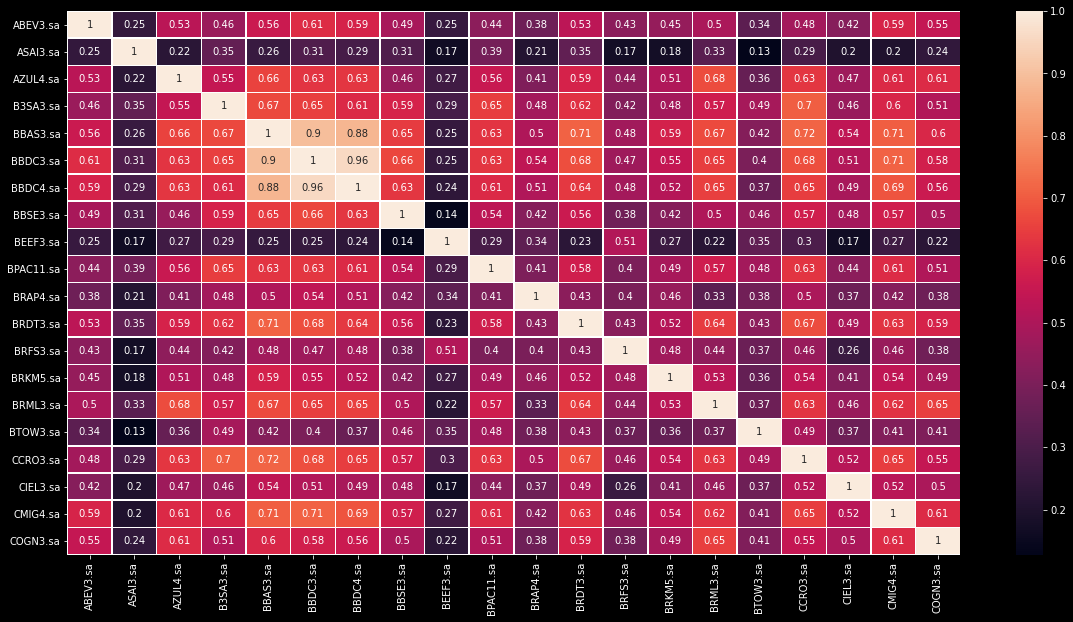

In [23]:
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corre, annot=True, linewidths=.5, ax=ax)

<AxesSubplot:>

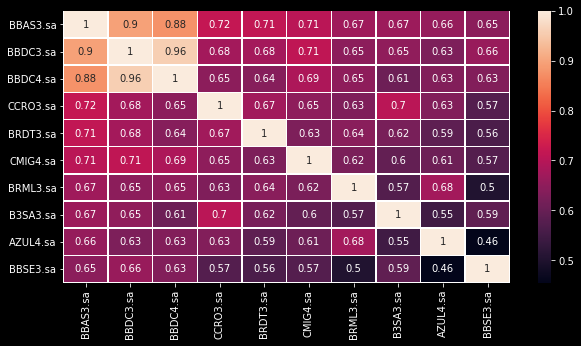

In [24]:
ativo='BBAS3.sa'
k = 10 #number of variables for heatmap
cols = corre.nlargest(k, ativo)[ativo].index
cm = output[cols].pct_change().corr()
f, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

<b>Fim da Atividade!!!</b> 
